11.1 Найти любой wav файл c музыкальной дорожкой

11.2 Загрузить в блокнот. Построить визуализацию

11.3 Применить фильтрацию Фурье для НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр.

11.4 Применить экспотенциальное сглаживание, двойное экспотенциальное, тройное экспотенциальное сглаживание

11.5 Разобраться в преобразовании Лапласа. Отфильтровать сигнал с помощью фильтра Чебышева (НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр) и Баттерворта.

11.6 Не забываем про визуализацию.

Применить фильтрацию Фурье для НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import seaborn
import pandas as pd

In [17]:
f = 'data/memory_reboot.wav'


samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
time = time[:len(time)]

print(f"длительность {duration} \n временная шкала {time} \n размерность времени {len(time)}")

canal1 = data[:,0]
canal2 = data[:,1]

Sampling Rate: 44100
Audio Shape: (9218948, 2)
длительность 209.04643990929705 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.09046372e+02
 2.09046395e+02 2.09046417e+02] 
 размерность времени 9218948


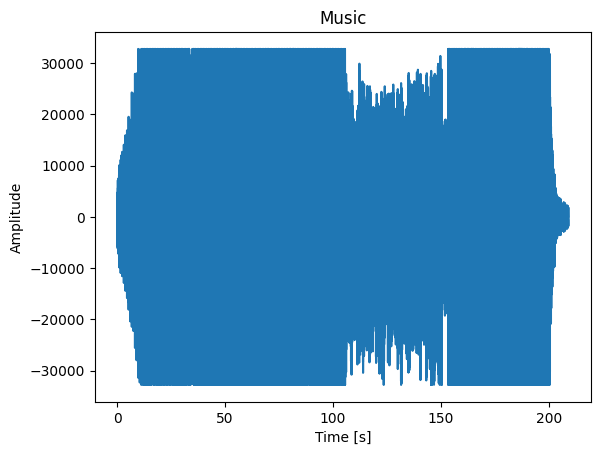

In [18]:
plt.plot(time, canal1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Music')
plt.show()

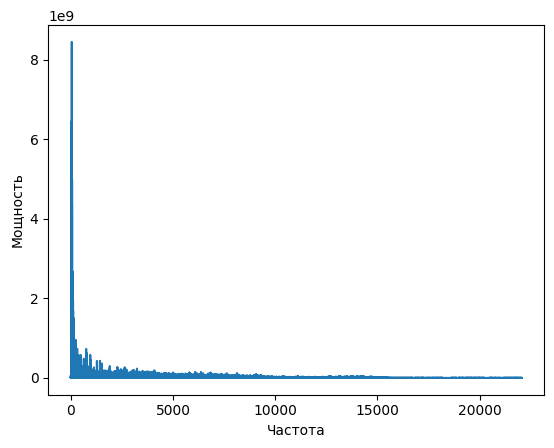

In [19]:
from scipy.fft import  rfft, rfftfreq, irfft


# число точек в normalized_tone
N = int(samplerate * duration)

yf = rfft(canal1)
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

In [20]:
points_per_freq = len(xf) / (max(xf))

target_idx_hf = int(points_per_freq * 900)
target_idx_lf = int(points_per_freq * 300)

yf_hf = yf.copy()
yf_lf = yf.copy()
yf_bp = yf.copy()
yf_zf = yf.copy()

yf_hf[:target_idx_hf] = 0

yf_lf[target_idx_lf:] = 0

yf_bp[:target_idx_lf] = 0
yf_bp[target_idx_hf:] = 0

yf_zf[target_idx_lf:target_idx_hf] = 0

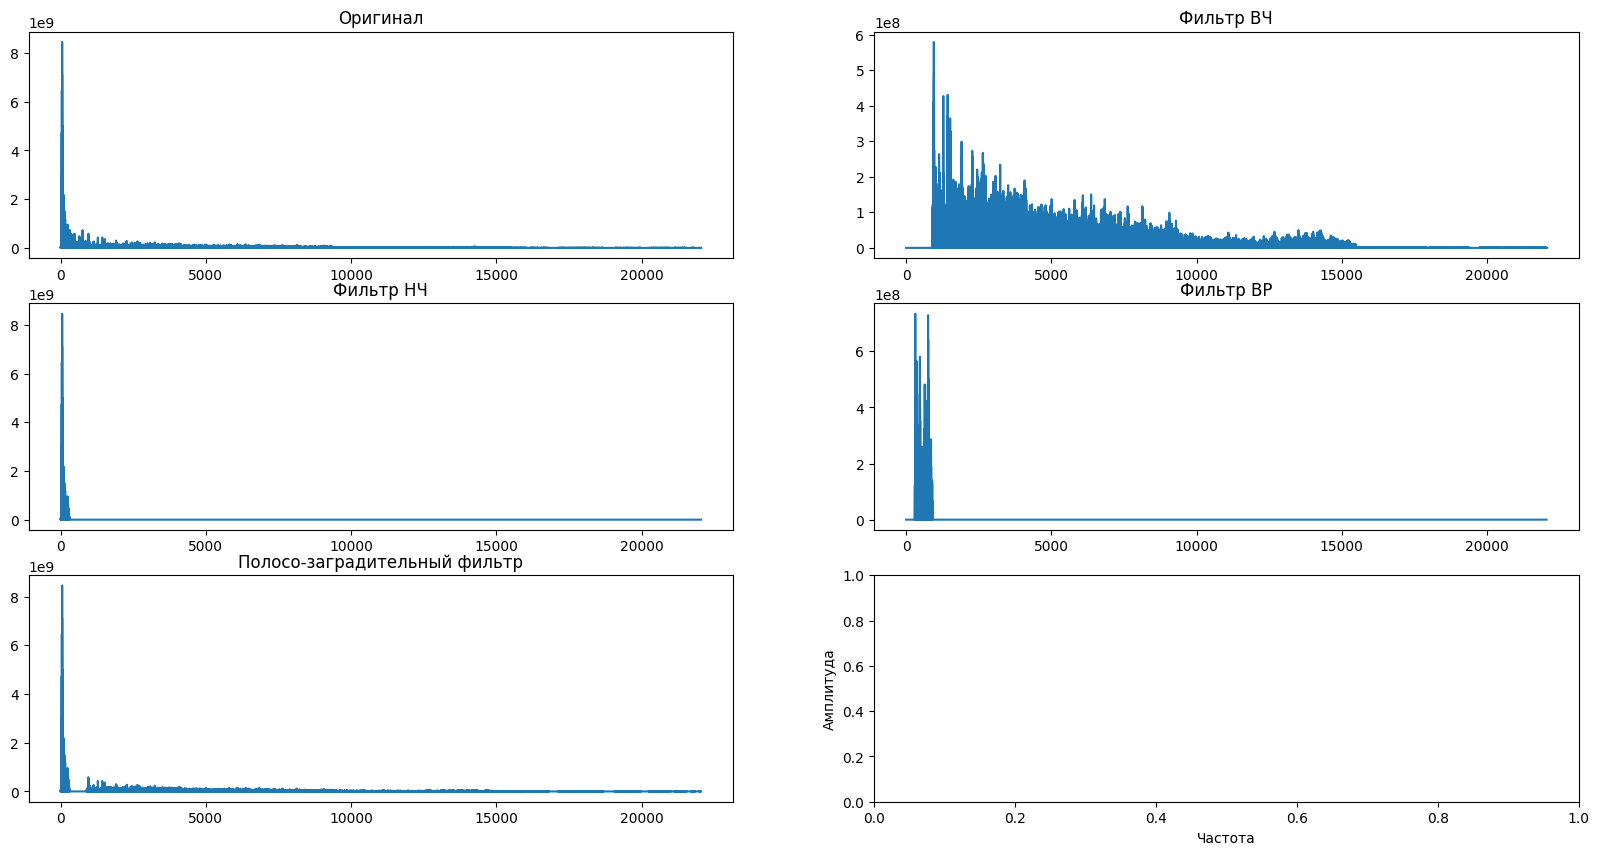

In [21]:
fig, ax = plt.subplots(nrows=3 , ncols=2, figsize=(20, 10))

ax[0,0].plot(xf, np.abs(yf))
ax[0,0].set_title("Оригинал")

ax[0,1].plot(xf, np.abs(yf_hf))
ax[0,1].set_title("Фильтр ВЧ")

ax[1,0].plot(xf, np.abs(yf_lf))
ax[1,0].set_title("Фильтр НЧ")

ax[1,1].plot(xf, np.abs(yf_bp))
ax[1,1].set_title("Фильтр BP")

ax[2,0].plot(xf, np.abs(yf_zf))
ax[2,0].set_title("Полосо-заградительный фильтр")

plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.show()

In [22]:
new_sig_hf = irfft(yf_hf)
new_sig_lf = irfft(yf_lf)
new_sig_bp = irfft(yf_bp)
new_sig_zf = irfft(yf_zf)

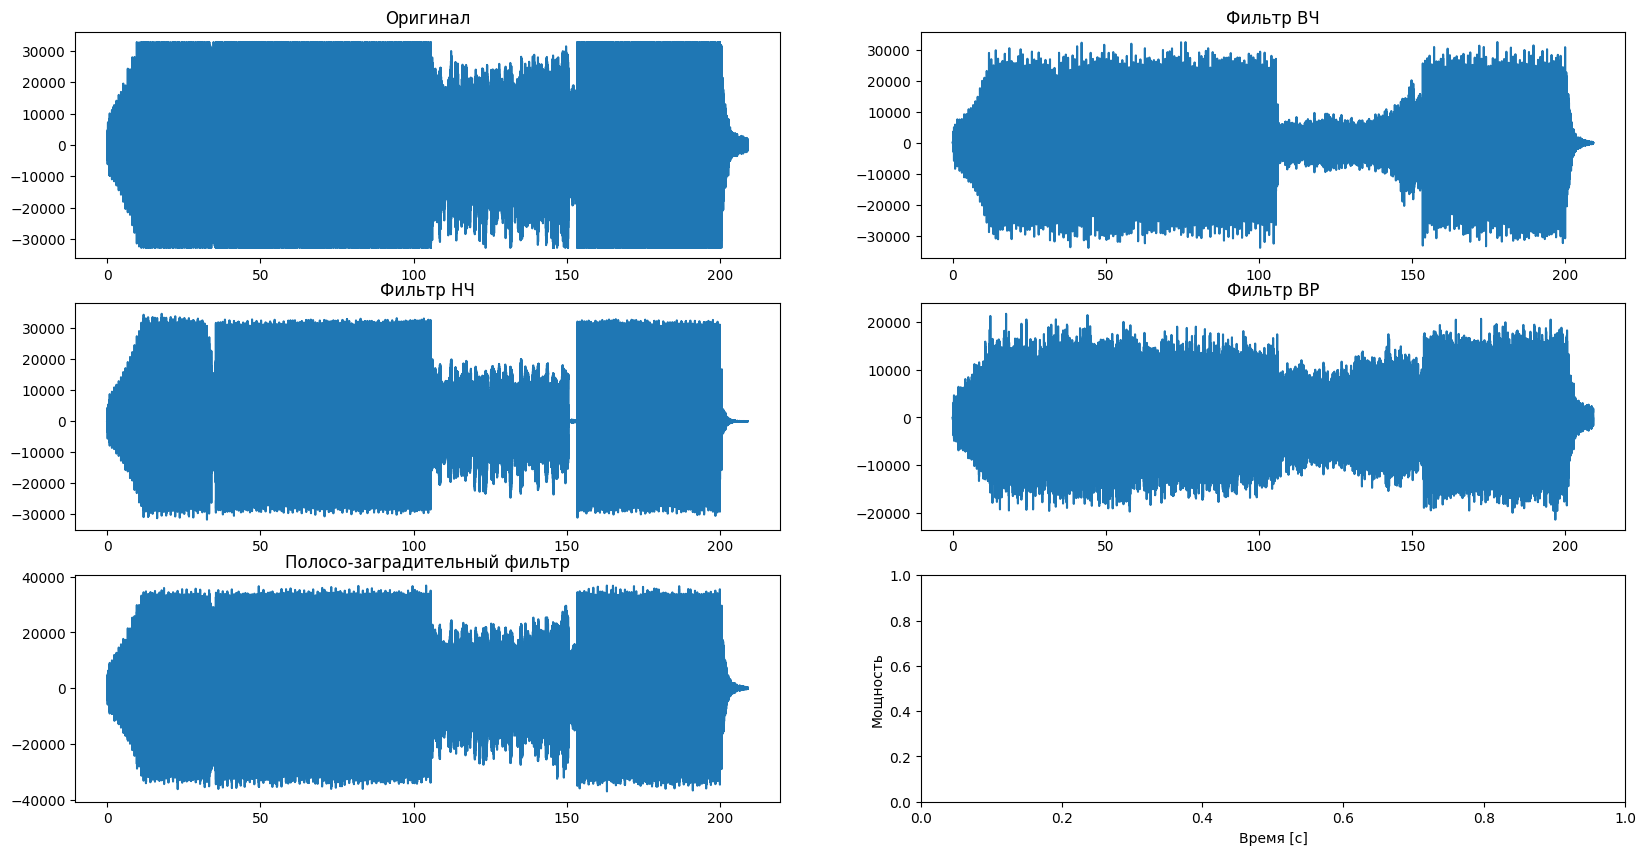

In [23]:
fig, ax = plt.subplots(nrows=3 , ncols=2, figsize=(20, 10))

ax[0,0].plot(time, canal1)
ax[0,0].set_title("Оригинал")

ax[0,1].plot(time, new_sig_hf)
ax[0,1].set_title("Фильтр ВЧ")

ax[1,0].plot(time, new_sig_lf)
ax[1,0].set_title("Фильтр НЧ")

ax[1,1].plot(time, new_sig_bp)
ax[1,1].set_title("Фильтр BP")

ax[2,0].plot(time, new_sig_zf)
ax[2,0].set_title("Полосо-заградительный фильтр")

plt.xlabel('Время [c]')
plt.ylabel('Мощность')

plt.show()

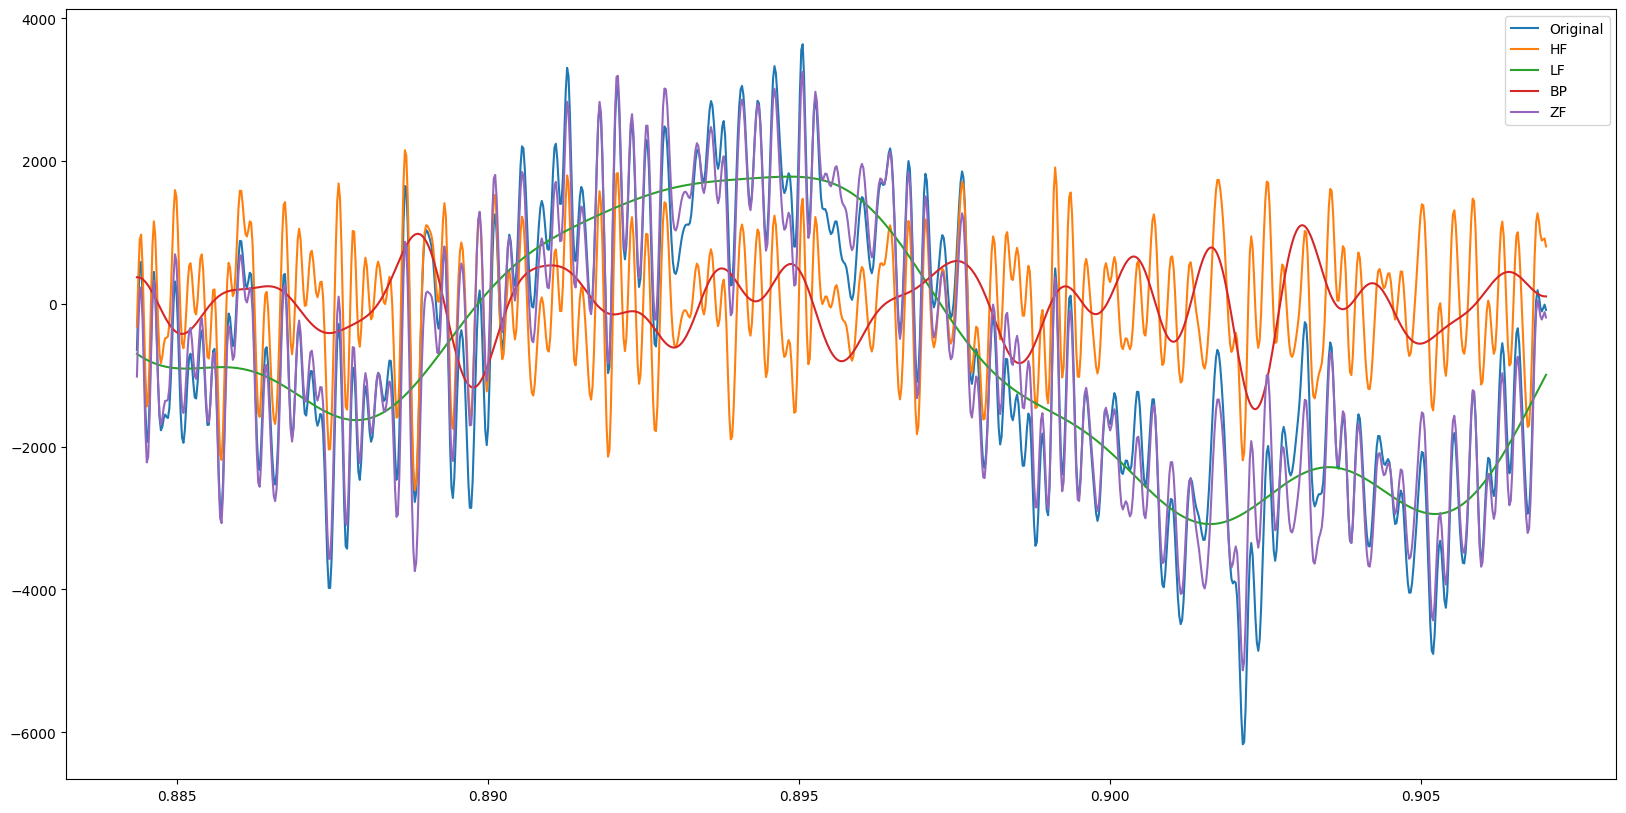

In [25]:
fig, ax = plt.subplots( figsize=(20, 10) )


original, = ax.plot(time[39000:40000], canal1[39000:40000], label='Original')
signal_hf, = ax.plot(time[39000:40000], new_sig_hf[39000:40000], label='HF')
signal_lf, = ax.plot(time[39000:40000], new_sig_lf[39000:40000], label='LF')
signal_bp, = ax.plot(time[39000:40000], new_sig_bp[39000:40000], label='BP')
signal_zf, = ax.plot(time[39000:40000], new_sig_zf[39000:40000], label='ZF')


ax.legend(handles=[original, signal_hf, signal_lf, signal_bp, signal_zf])

plt.show()

In [26]:
sd.play(canal1, samplerate)

In [29]:
sd.play(new_sig_hf, samplerate)

In [ ]:
sd.play(new_sig_lf, samplerate)

In [33]:
sd.play(new_sig_bp, samplerate)

In [34]:
sd.play(new_sig_zf, samplerate)

In [35]:
sd.stop()

Применить экспотенциальное сглаживание, двойное экспотенциальное, тройное экспотенциальное сглаживание.

In [36]:
def exponential_smoothing(values, alpha):
    result = [values[0], values[1]]    
    for n in range(1, len(values)):
        result.append(alpha * result[n] + (1 - alpha) * values[n-1])    
    return result

In [37]:
def double_exponential_smoothing(values, alpha, beta):
    result = [values[0]]
    for n in range(1, len(values)+1):
        if n == 1:
            level, trend = values[0], values[1] - values[0]
        if n >= len(values):
            value = values[-1]
        else:
            value = values[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [38]:
def plot_exponential_smoothing(series, alphas):
    with plt.style.context("_classic_test_patch"):  
        plt.figure(figsize=(15, 7))

        plt.plot(series[1], "c", label="Actual")

        for alpha in alphas:
            plt.plot(exponential_smoothing(series[1], alpha), label="Alpha {}".format(alpha))

        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True)

In [39]:
def plot_double_exponential_smoothing(signal_part, alphas, betas):    
    with plt.style.context('seaborn-v0_8-white'):
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(signal_part, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(signal_part, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

In [40]:
signal_part = canal1[39000:40000]
time_part = time[39000:40000]
 
series = pd.Series([time[39000:40000], canal1[39000:40000]])

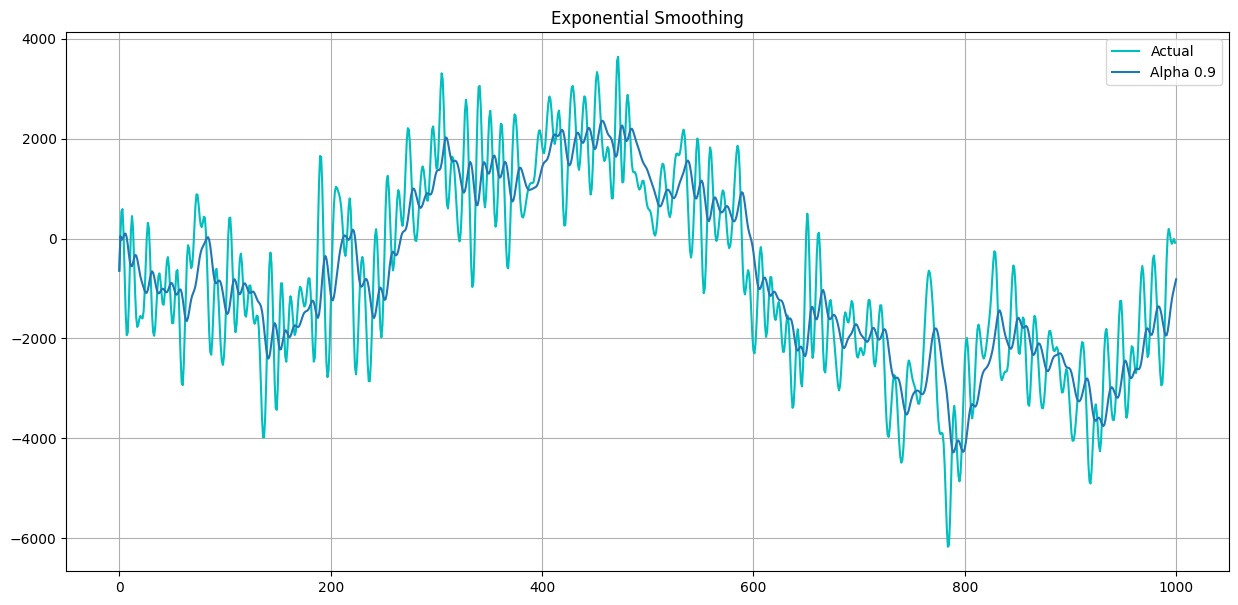

In [41]:
plot_exponential_smoothing(series, alphas=[0.9])

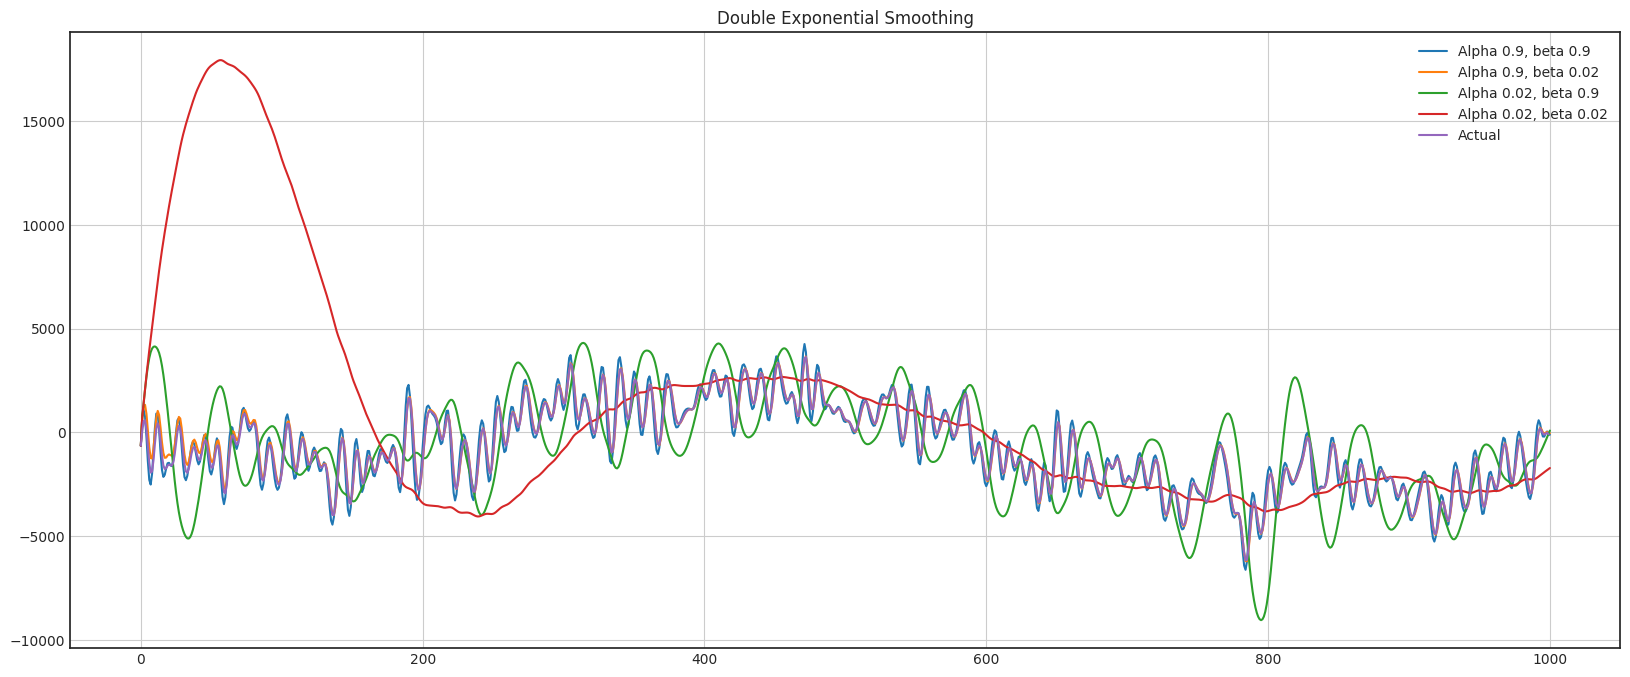

In [42]:
plot_double_exponential_smoothing(signal_part, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [43]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)

    for j in range(n_seasons):
        season_averages.append(sum(series[slen * j:slen * j + slen]) / float(slen))

    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0:
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series):
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

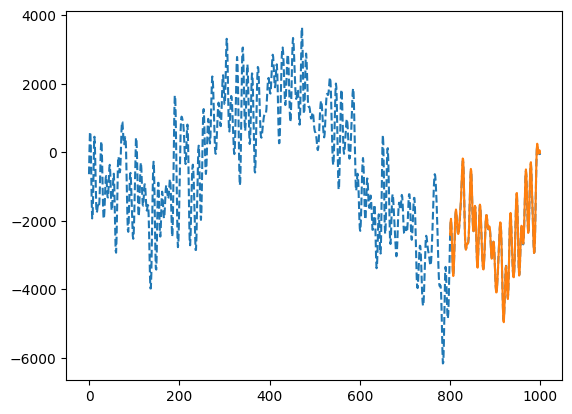

In [44]:
count = 200
ind = len(signal_part) - count
vals = triple_exponential_smoothing(signal_part, 12, 0.716, 0.029, 0.993, count)

x = range(ind + count)
x_pr = range(ind, ind + count)

plt.plot(x[:], signal_part[:], linestyle='dashed')
plt.plot(x_pr, vals[ind:ind + count])
plt.show()

Разобраться в преобразовании Лапласа. Отфильтровать сигнал с помощью фильтра Чебышева (НЧ, ФЧ фильтров, полосовой фильтр, полосо-заградительный фильтр) и Баттерворта.

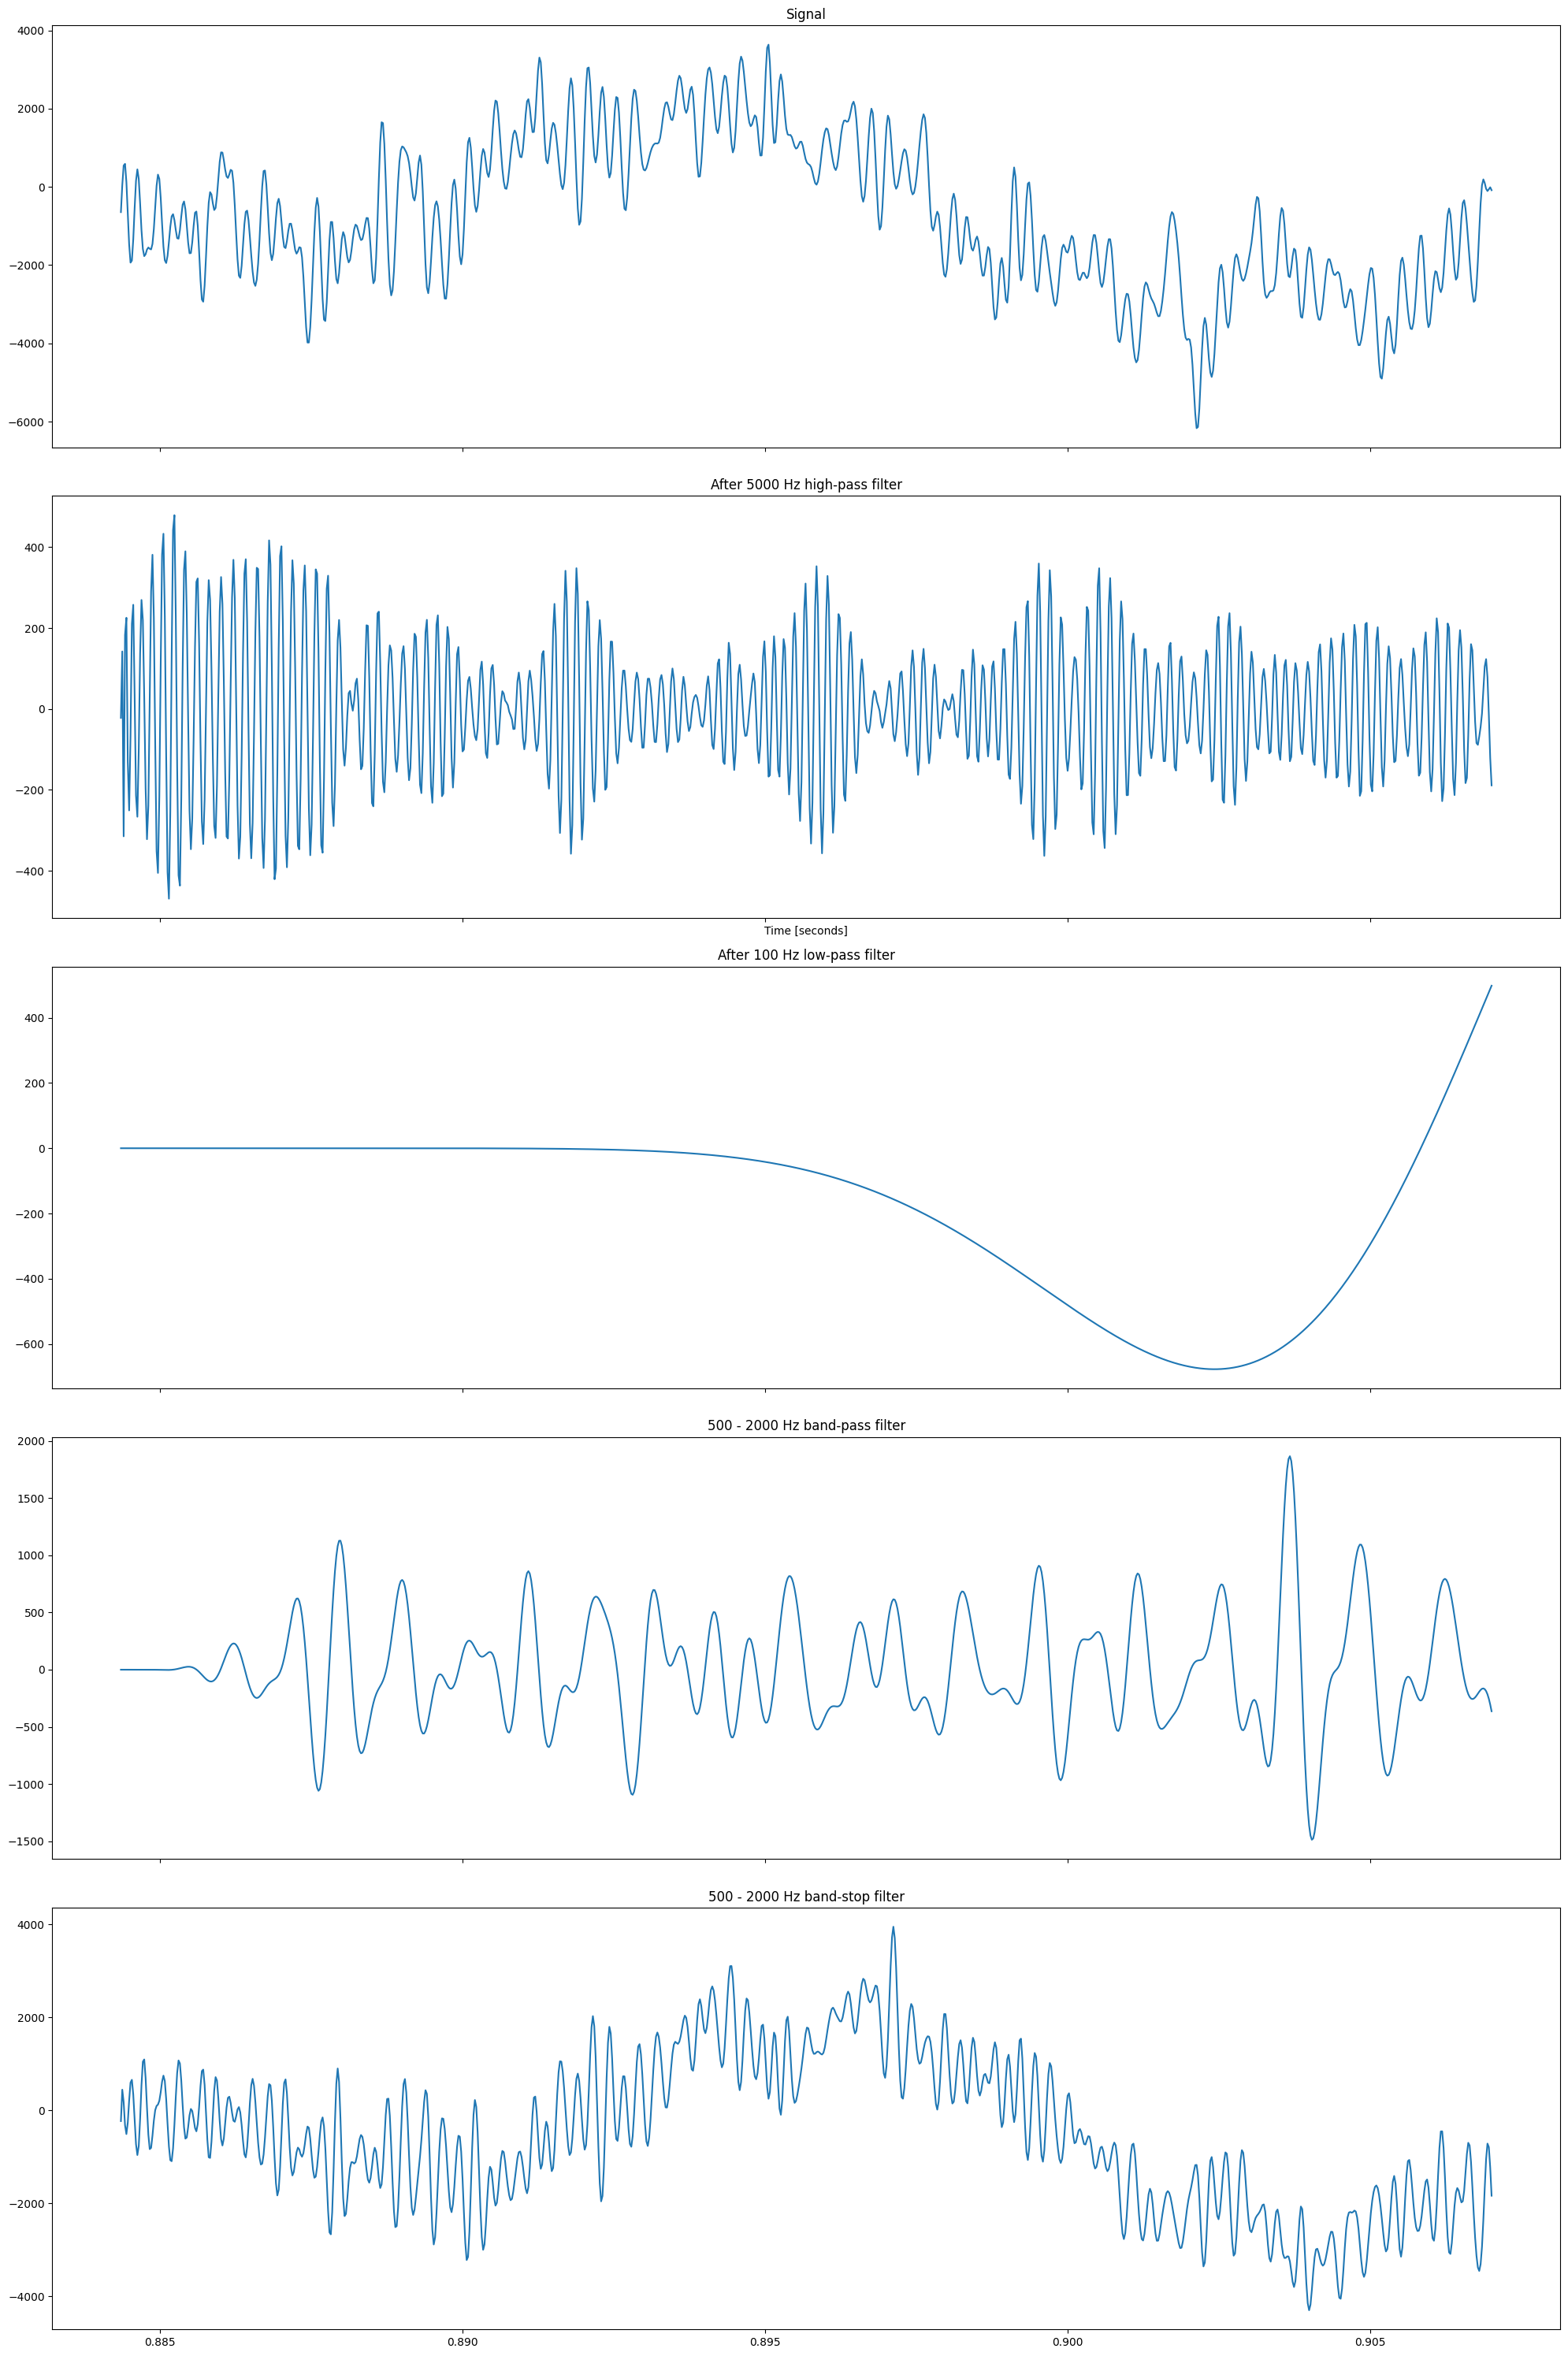

In [45]:
sos_hp = signal.cheby1(10, 1, 5000, 'hp', fs=samplerate, output='sos')
filtered_hp = signal.sosfilt(sos_hp, signal_part)

sos_lp = signal.cheby1(10, 1, 100, 'lp', fs=samplerate, output='sos')
filtered_lp = signal.sosfilt(sos_lp, signal_part)

sos_bp = signal.cheby1(10, 1, [500, 2000], 'bp', fs=samplerate, output='sos')
filtered_bp = signal.sosfilt(sos_bp, signal_part)

sos_bs = signal.cheby1(10, 1, [500, 2000], 'bs', fs=samplerate, output='sos')
filtered_bs = signal.sosfilt(sos_bs, signal_part)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(20,30))
ax1.plot(time_part, signal_part)
ax1.set_title('Signal')

ax2.plot(time_part, filtered_hp)
ax2.set_title('After 5000 Hz high-pass filter')

ax3.plot(time_part, filtered_lp)
ax3.set_title('After 100 Hz low-pass filter')

ax4.plot(time_part, filtered_bp)
ax4.set_title('500 - 2000 Hz band-pass filter')
 
ax5.plot(time_part, filtered_bs)
ax5.set_title('500 - 2000 Hz band-stop filter')

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [46]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

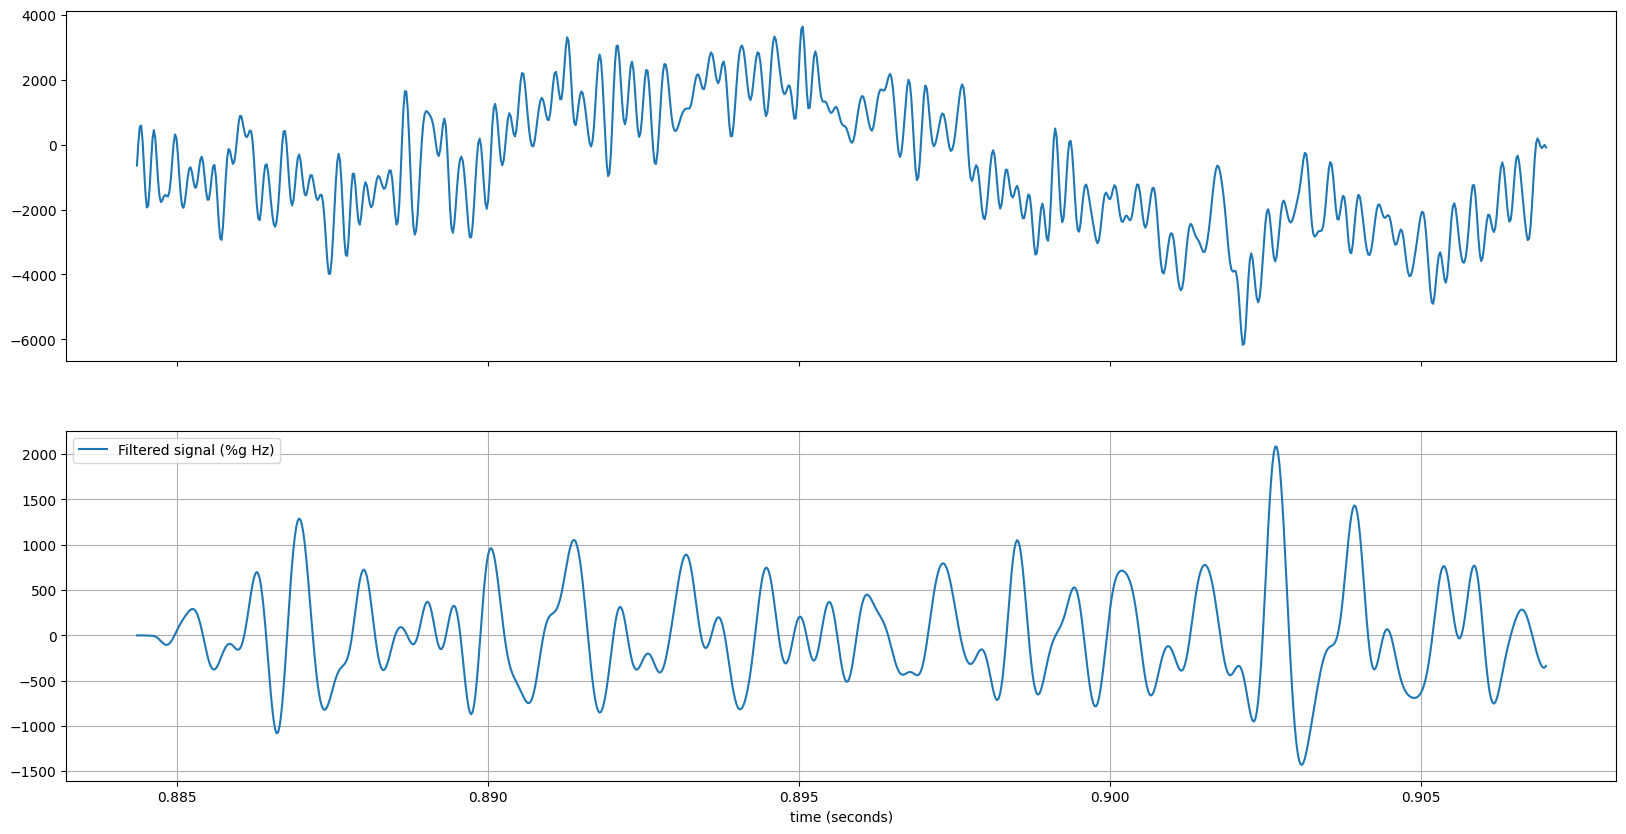

In [47]:
fs = samplerate

lowcut = 500
highcut = 2000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

ax1.plot(time_part, signal_part, label='Noisy signal')

y = butter_bandpass_filter(signal_part, lowcut, highcut, fs, order=6)
ax2.plot(time_part, y, label='Filtered signal (%g Hz)')

plt.xlabel('time (seconds)')
 
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()